In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../training/player2.jpg"
player = cv2.imread(image_path)
player = cv2.cvtColor(player, cv2.COLOR_BGR2RGB)

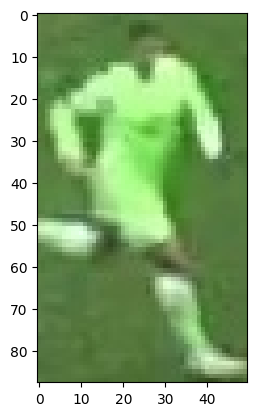

In [4]:
plt.imshow(player)

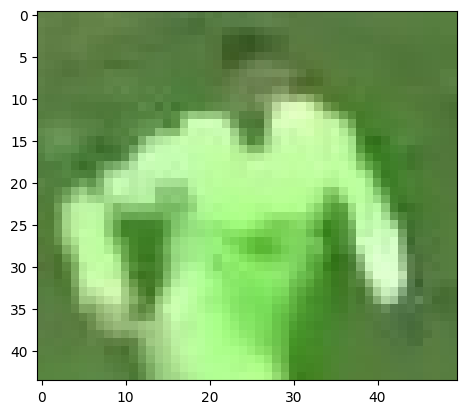

In [6]:
jersey = player[0: player.shape[0]//2, :]
plt.imshow(jersey)

__Use Kmeans to cluster image into two different colours__

In [19]:
image = jersey.reshape(-1, 3) 
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image)

KMeans(n_clusters=2, random_state=0)

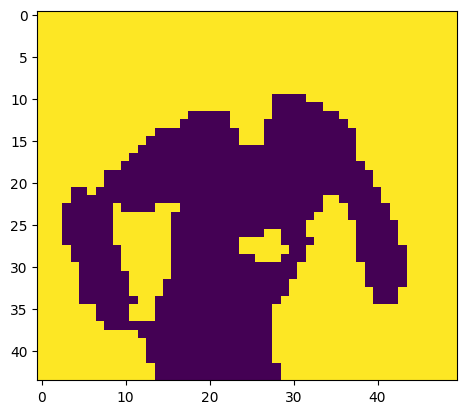

In [37]:
labels = kmeans.labels_
clustered_img = labels.reshape(jersey.shape[0], jersey.shape[1])

# Image without axis
plt.imshow(clustered_img)

__As we are unaware of the labels `kmeans` gave to background colour and player, we consider the colour of the corners as background.__

In [41]:
corners = [clustered_img[0, 0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1, -1]]
background = max(set(corners), key=corners.count)
jersey_colour = int(not background)

print("LABELS : ")
print("Background Colour : ", background)
print("Jersey Colour : ", jersey_colour)

LABELS : 
Background Colour :  1
Jersey Colour :  0


In [44]:
rgb_code = kmeans.cluster_centers_[jersey_colour]
rgb_code

array([171.30106101, 235.67374005, 142.79177719])

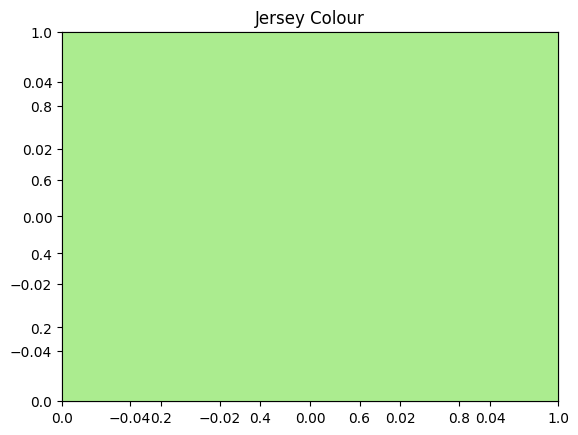

In [51]:
plt.plot()
plt.title("Jersey Colour")
ax = plt.axes()
ax.set_facecolor(rgb_code/255)